<a href="https://colab.research.google.com/github/HrideshSingh/MachineLearningLab/blob/main/NonLinearSVM(RBF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.svm import SVC 

In [2]:
style.use('fivethirtyeight')

# Create mesh grids

In [3]:
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the contours

In [4]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
color = ['r', 'b', 'g', 'k']
  
iris = pd.read_csv("Iris.csv").values
  
  
features = iris[0:150, 2:4]
level1 = np.zeros(150)
level2 = np.zeros(150)
level3 = np.zeros(150)

# level1 contains 1 for class1 and 0 for all others.
# level2 contains 1 for class2 and 0 for all others.
# level3 contains 1 for class3 and 0 for all others.

for i in range(150):
    if i>= 0 and i<50:
        level1[i] = 1
    elif i>= 50 and i<100:
        level2[i] = 1
    elif i>= 100 and i<150:
        level3[i]= 1

# create 3 svm with rbf kernels

In [5]:
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')

# fit each svm's

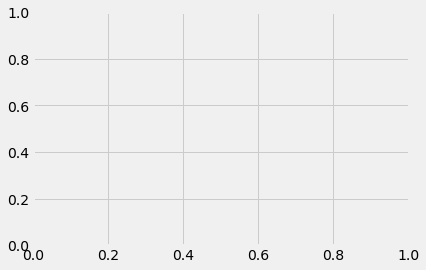

In [6]:
svm1.fit(features, level1)
svm2.fit(features, level2)
svm3.fit(features, level3)

fig, ax = plt.subplots()
X0, X1 = iris[:, 2], iris[:, 3]
xx, yy = make_meshgrid(X0, X1)

# plot the contours

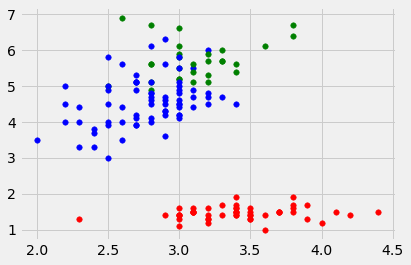

In [7]:
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)

color = ['r', 'b', 'g', 'k']
  
for i in range(len(iris)):
    plt.scatter(iris[i][2], iris[i][3], s = 30, c = color[int(iris[i][4])])
plt.show()  